In [15]:
import os
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from matplotlib import pyplot as plt
from sqlalchemy.engine import Engine
from sqlalchemy import create_engine

base_path = "/media/bruno/Arquivos/Desenvolvimento/WineQuality"
load_dotenv(f"{base_path}/config/.env")

True

In [2]:
def get_engine() -> Engine:
    user = os.getenv("DB_USER")
    pw = os.getenv("DB_PASS")
    db = os.getenv("DB_NAME")
    host = os.getenv("DB_HOST")
    port = os.getenv("DB_PORT")
    return create_engine(f"mysql+pymysql://{user}:{pw}@{host}:{port}/{db}")

Uma das características marcantes dos vinhos para os apreciadores é o aroma. Quimicamente, compostos voláteis são responsáveis por dar essa característica à bebida. Por outro lado, o gosto amargo é resultante da oxidação do álcool, seja pela exposição ao ar atmosférico ou devido ao próximo oxigênio que pode estar dissolvido no vinho. Assim, uma parte interessante é avaliar a nota do vinho com algumas substâncias chave.

Observando a composição relativa, o pH não apresenta uma diferença tão crucial entre os vinhos de alta qualidade e baixa qualidade. Isso significa que a diferença não está no potencial atual, mas sim após. O processo de degustação de vinhos envolve uma espera entre a disposição na taça e a devida ingestão, tempo em que o líquido fica em contato com o ar, podendo sofrer oxidação. Por que os vinhos de alta qualidade não oxidam? Dois pontos são revelados:

1. Maior quantidade de ácidos cítricos;
2. Menor quantidade de dióxido de enxofre.

Os dados apresentados validam a teoria química de equilíbrio. Com maior concentração de ácido (causada pelo ácido cítrico), a reação de oxidação do álcool se torna menos favorável entropicamente, o que mantêm o teor alcóolico dos vinhos de qualidade elevado. Junto disso, o dióxido de enxofre que é altamente capaz de ionizar o álcool e iniciar a reação de oxidação também apresenta menor concentração.

Essa poderosa combinação também permite a existência de maior quantidade de açúcares nos vinhos de alta qualidade, que não são utilizados para fermentação e podem exercer a função de potencializar o sabor da bebida.

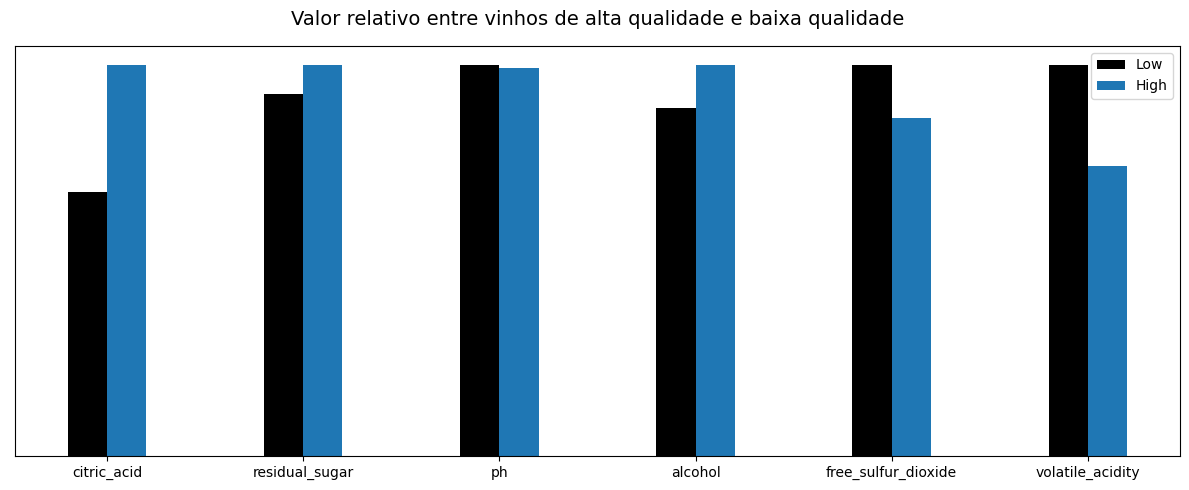

In [55]:
def show_relation():
    engine = get_engine()
    with engine.connect() as conn:
        query = """
            select
                avg(s.citric_acid) as citric_acid,
                avg(s.residual_sugar) as residual_sugar,
                avg(s.ph) as ph,
                avg(s.alcohol) as alcohol,
                avg(s.free_sulfur_dioxide) as free_sulfur_dioxide,
                avg(s.volatile_acidity) as volatile_acidity,
                s.classification as category
            from (
                select
                    *,
                    if(quality >= 7, 'HIGH', 'LOW') as classification
                from wine_results
            ) as s
            group by s.classification
        """
        dataset = pd.read_sql(query, conn)
        
        labels = ["citric_acid", "residual_sugar", "ph", "alcohol", "free_sulfur_dioxide", "volatile_acidity"]
        low_values = [dataset.query("category == 'LOW'")[l].values[0] / max(dataset[l].values) for l in labels]
        high_values = [dataset.query("category == 'HIGH'")[l].values[0] / max(dataset[l].values) for l in labels]

        x = np.arange(len(labels))
        width = 0.2

        fig, ax = plt.subplots(figsize=(12, 5))
        ax.bar(x - width / 2, low_values, width, label="Low", color="#000")
        ax.bar(x + width / 2, high_values, width, label="High")

        ax.set_title("Valor relativo entre vinhos de alta qualidade e baixa qualidade", fontdict={"fontsize": 14}, pad=15)
        ax.set_xticks(x, labels)
        ax.set_yticks([])
        ax.legend()

        fig.tight_layout()
        plt.show()

show_relation()